[2,
 3,
 1,
 3,
 4,
 1,
 2,
 4,
 5,
 2,
 3,
 5,
 6,
 1,
 3,
 4,
 6,
 7,
 1,
 2,
 4,
 5,
 7,
 8,
 2,
 3,
 5,
 6,
 8,
 9,
 1,
 3,
 4,
 6,
 7,
 9,
 10,
 1,
 2,
 4,
 5,
 7,
 8,
 10,
 11,
 2,
 3,
 5,
 6,
 8,
 9,
 11,
 12,
 1,
 3,
 4,
 6,
 7,
 9,
 10,
 12,
 13,
 1,
 2,
 4,
 5,
 7,
 8,
 10,
 11,
 13,
 14,
 2,
 3,
 5,
 6,
 8,
 9,
 11,
 12,
 14,
 15,
 1,
 3,
 4,
 6,
 7,
 9,
 10,
 12,
 13,
 15,
 16,
 1,
 2,
 4,
 5,
 7,
 8,
 10,
 11,
 13,
 14,
 16,
 17,
 2,
 3,
 5,
 6,
 8,
 9,
 11,
 12,
 14,
 15,
 17,
 18,
 1,
 3,
 4,
 6,
 7,
 9,
 10,
 12,
 13,
 15,
 16,
 18,
 19,
 4,
 4,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,

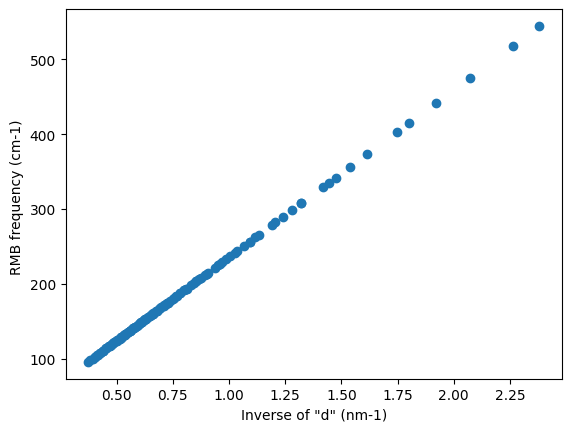

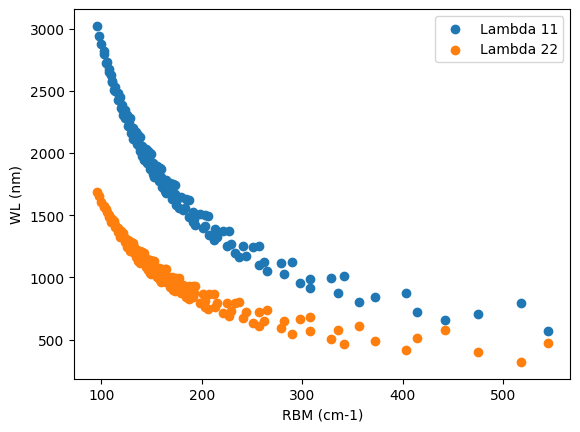

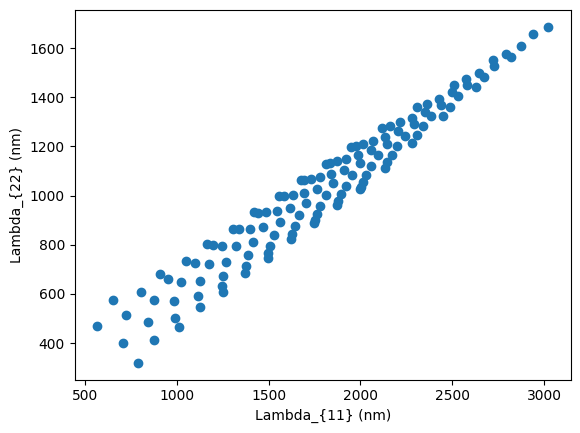

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# My first script :)
a = 0.144  # Interatomic spacing



def calculateRBM(n, m):
    Acons = 223.5
    Bcons = 12.5
    return (Acons / calculateD(n, m)) + Bcons


def calculateD(n, m):
    global a
    factor = n * n + n * m + m * m
    return (a / np.pi) * np.sqrt(3 * factor)


def calculateA1(n, m):
    result = (n - m) % 3
    if result == 1:
        return -710.0
    elif result == 2:
        return 369.0


def calculateA2(n, m):
    result = (n - m) % 3
    if result == 1:
        return 1375.0
    elif result == 2:
        return -1475.0


def calculate_lambdas(n, m):
    factor = n * n + n * m + m * m
    cos_alpha = (n + 0.5 * m) / np.sqrt(factor)
    D = calculateD(n, m)

    b = 10000000.0
    c = 157.5
    e = 1066.9
    f = 145.6
    g = 575.7

    A1 = calculateA1(n, m)
    A2 = calculateA2(n, m)

    cos3factor = 4 * (cos_alpha ** 3) - 3 * cos_alpha

    lambda11 = b / ((b / (c + e * D)) + (A1 * cos3factor / (D * D)))
    lambda22 = b / ((b / (f + g * D)) + (A2 * cos3factor / (D * D)))

    return lambda11, lambda22


# Initialize empty arrays
l11_array = []
l22_array = []
m_array = []
n_array = []
D_array = []
InverseD_array = []
RBM_array = []

for n in range(4, 21):  # Adjust the range as needed
    for m in range(1, n + 1):  # Adjust the range as needed
        result = (n - m) % 3
        if result == 1 or result == 2:
            l11, l22 = calculate_lambdas(n, m)
            m_array.append(m)
            n_array.append(n)
            l11_array.append(l11)  # Save value in the array
            l22_array.append(l22)  # Save value in the array
            D_array.append(calculateD(n, m))
            InverseD_array.append(1 / calculateD(n, m))
            RBM_array.append(calculateRBM(n, m))

plt.figure()
plt.subplot(1, 1, 1)
plt.scatter(InverseD_array, RBM_array)
plt.xlabel('Inverse of "d" (nm-1)')
plt.ylabel('RMB frequency (cm-1) ')

plt.figure()
plt.subplot(1, 1, 1)
plt.scatter(RBM_array, l11_array, label='Lambda 11')
plt.scatter(RBM_array, l22_array, label='Lambda 22')
plt.xlabel('RBM (cm-1)')
plt.ylabel('WL (nm)')
plt.legend()

plt.figure()
plt.subplot(1, 1, 1)
plt.scatter(l11_array, l22_array)
plt.xlabel('Lambda_{11} (nm)')
plt.ylabel('Lambda_{22} (nm)')

